# Car Price Prediction System

## Objective
The objective of this project is to build a **machine learning model** that can accurately predict the price of a car based on its features such as brand, fuel type, transmission, engine specifications, and other relevant attributes.

## Machine Learning Workflow
1. Load and understand the dataset  
2. Perform Exploratory Data Analysis (EDA)  
3. Clean data and select relevant features  
4. Preprocess data using pipelines  
5. Train a Random Forest regression model  
6. Evaluate model performance  
7. Save and reload the trained model  


In [11]:
# Import required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

import pickle


## Dataset Loading and Overview


In [12]:
# Load dataset
df = pd.read_csv("car_price_dataset.csv")

# Display first 5 rows
df.head()


,Brand,Model,Year,CarAge,Condition,Mileage(km),EngineSize(L),FuelType,Horsepower,Torque,...,Color,Interior,Options,City,AccidentHistory,Insurance,RegistrationStatus,FuelEfficiency(L/100km),PricePerKm,Price($)
0,Porsche,Panamera,2008,17,Used,256395,3.3,Gasoline,513,395,...,White,Cloth,"Navigation, Cruise Control, Heated Seats, Blue...",Tehran,No,Valid,Incomplete,11.96,0.05,13884
1,Audi,A6,2023,2,Used,20433,2.2,Diesel,302,270,...,Black,Cloth,"Parking Sensors, Cruise Control, Touchscreen",Berlin,Yes,Expired,Incomplete,8.74,1.90,38888
2,BMW,X5,2022,3,Used,52328,3.2,Gasoline,400,388,...,Gray,Leather,"Touchscreen, Bluetooth, Cruise Control, Naviga...",Tokyo,Yes,Valid,Complete,15.68,0.63,33074
3,Hyundai,Tucson,2019,6,Used,91878,1.6,Hybrid,187,219,...,Silver,Cloth,"Sunroof, Rear Camera, Bluetooth, Parking Senso...",Delhi,No,Expired,Complete,9.45,0.14,12966
4,Fiat,500,2012,13,Damaged,192331,1.1,Gasoline,90,112,...,Red,Leather,"Heated Seats, Touchscreen",Delhi,No,Valid,Complete,7.16,0.01,2670


In [13]:
# Dataset shape
df.shape


(50000, 25)

In [33]:
df.describe()

,Year,CarAge,Mileage(km),EngineSize(L),Horsepower,Torque,Doors,Seats,FuelEfficiency(L/100km),PricePerKm,Price($)
count,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,47541.000000,50000.000000
mean,2014.99852,10.00148,150048.081460,2.127286,279.731440,326.660080,4.139060,4.721720,9.346222,0.305946,15780.750960
std,6.06553,6.06553,91085.992898,1.139203,153.703605,137.000291,0.979276,1.080418,4.072040,0.855643,16838.548646
min,2005.00000,0.00000,0.000000,0.000000,65.000000,16.000000,2.000000,2.000000,0.000000,0.000000,1249.000000
25%,2010.00000,5.00000,71548.000000,1.400000,179.000000,227.000000,4.000000,5.000000,7.530000,0.020000,4943.000000
50%,2015.00000,10.00000,150478.000000,2.000000,240.000000,307.000000,4.000000,5.000000,9.680000,0.060000,10063.000000
75%,2020.00000,15.00000,228461.500000,2.800000,386.000000,415.000000,5.000000,5.000000,11.980000,0.220000,19745.250000
max,2025.00000,20.00000,320262.000000,6.000000,905.000000,850.000000,5.000000,7.000000,21.180000,34.560000,131850.000000


In [41]:
df[df["FuelEfficiency(L/100km)"] > 15]


,Brand,Model,Year,CarAge,Condition,Mileage(km),EngineSize(L),FuelType,Horsepower,Torque,...,Color,Interior,Options,City,AccidentHistory,Insurance,RegistrationStatus,FuelEfficiency(L/100km),PricePerKm,Price($)
2,BMW,X5,2022,3,Used,52328,3.2,Gasoline,400,388,...,Gray,Leather,"Touchscreen, Bluetooth, Cruise Control, Naviga...",Tokyo,Yes,Valid,Complete,15.68,0.63,33074
6,Mercedes-Benz,S-Class,2019,6,Used,82607,5.8,Hybrid,509,750,...,Silver,Cloth,"Navigation, Parking Sensors, Touchscreen",Los Angeles,Yes,Expired,Complete,17.83,0.62,51189
27,BMW,5 Series,2025,0,New,896,4.4,Gasoline,351,556,...,Black,Cloth,Parking Sensors,Dubai,No,Valid,Complete,15.13,NaN,54123
48,BMW,X5,2007,18,Used,271134,4.1,Hybrid,465,555,...,Blue,Cloth,"Heated Seats, Touchscreen, Cruise Control, Par...",Cape Town,No,Expired,Complete,17.32,0.03,7676
51,Mercedes-Benz,S-Class,2021,4,Used,64760,5.5,Gasoline,508,696,...,Red,Leather,Rear Camera,Tokyo,Yes,Expired,Incomplete,18.16,1.05,67684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49893,Ford,F-150,2018,7,Used,103294,4.8,Hybrid,424,602,...,Silver,Leather,"Cruise Control, Parking Sensors",Berlin,No,Valid,Incomplete,19.77,0.15,15872
49923,BMW,X5,2013,12,Used,171388,4.0,Gasoline,424,534,...,White,Cloth,"Rear Camera, Parking Sensors, Sunroof, Touchsc...",Delhi,No,Expired,Complete,16.64,0.10,17861
49928,BMW,X5,2014,11,Damaged,165178,3.7,Gasoline,426,500,...,Silver,Leather,"Cruise Control, Bluetooth, Heated Seats",Tokyo,No,Expired,Complete,15.80,0.08,12706
49994,BMW,X5,2022,3,Used,36433,3.6,Gasoline,447,427,...,Gray,Cloth,"Heated Seats, Cruise Control, Rear Camera, Nav...",Tehran,No,Expired,Complete,15.81,1.26,45762


In [14]:
# Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    50000 non-null  object 
 1   Model                    50000 non-null  object 
 2   Year                     50000 non-null  int64  
 3   CarAge                   50000 non-null  int64  
 4   Condition                50000 non-null  object 
 5   Mileage(km)              50000 non-null  int64  
 6   EngineSize(L)            50000 non-null  float64
 7   FuelType                 50000 non-null  object 
 8   Horsepower               50000 non-null  int64  
 9   Torque                   50000 non-null  int64  
 10  Transmission             50000 non-null  object 
 11  DriveType                50000 non-null  object 
 12  BodyType                 50000 non-null  object 
 13  Doors                    50000 non-null  int64  
 14  Seats                 

In [15]:
# Missing values
df.isnull().sum()


Brand                         0
Model                         0
Year                          0
CarAge                        0
Condition                     0
Mileage(km)                   0
EngineSize(L)                 0
FuelType                      0
Horsepower                    0
Torque                        0
Transmission                  0
DriveType                     0
BodyType                      0
Doors                         0
Seats                         0
Color                         0
Interior                      0
Options                       0
City                          0
AccidentHistory               0
Insurance                     0
RegistrationStatus            0
FuelEfficiency(L/100km)       0
PricePerKm                 2459
Price($)                      0
dtype: int64

## Exploratory Data Analysis (EDA)


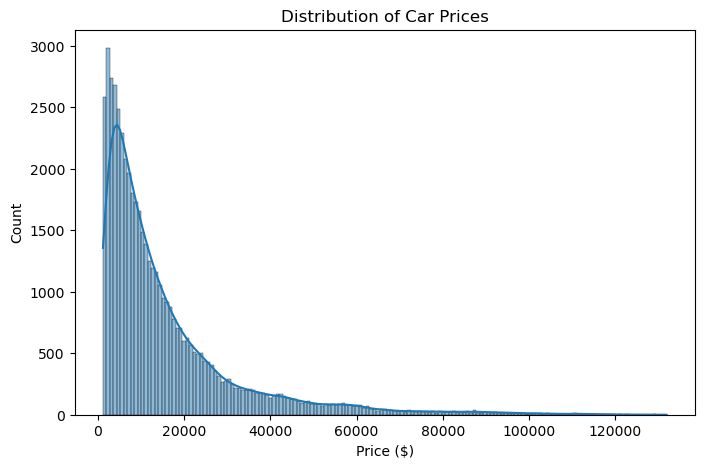

In [16]:
# Distribution of target variable
plt.figure(figsize=(8, 5))
sns.histplot(df["Price($)"], kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()


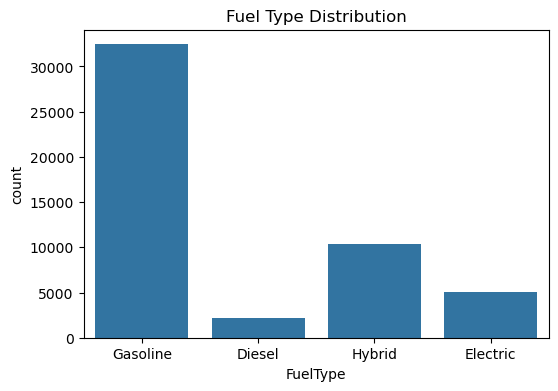

In [17]:
# Count plot for Fuel Type
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="FuelType")
plt.title("Fuel Type Distribution")
plt.show()


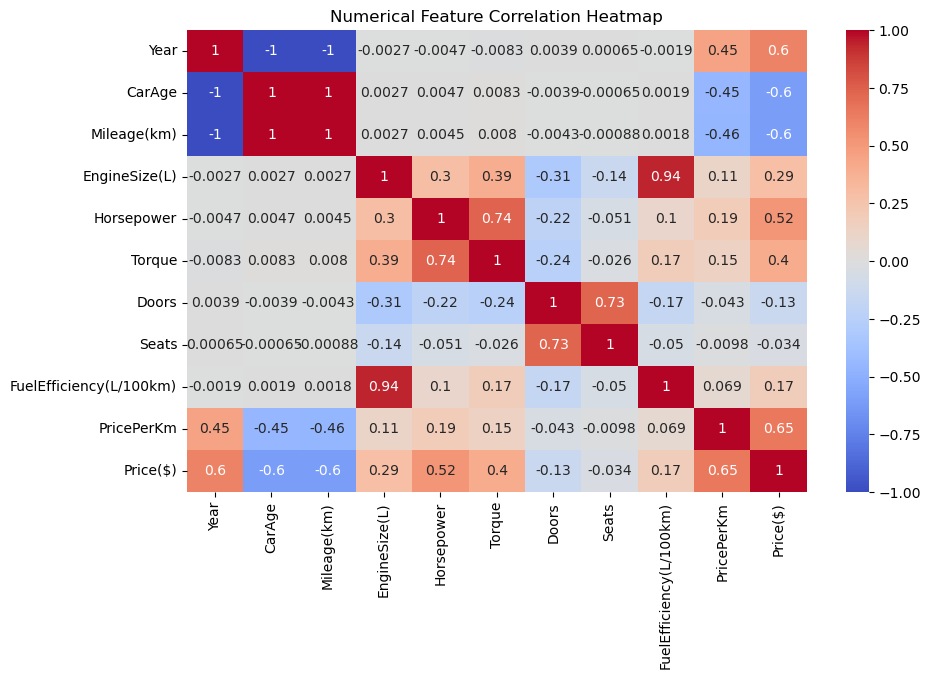

In [18]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
num_df = df.select_dtypes(include=np.number)
sns.heatmap(num_df.corr(), cmap="coolwarm", annot=True)
plt.title("Numerical Feature Correlation Heatmap")
plt.show()


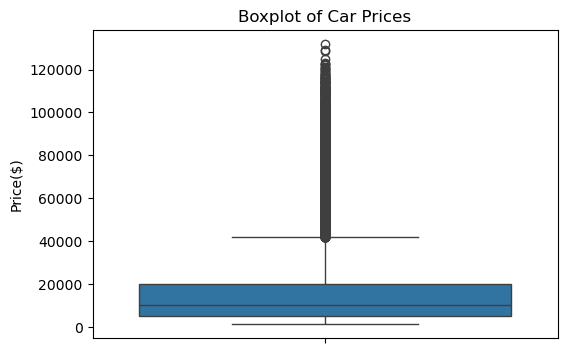

In [19]:
# Boxplot for price (outlier detection)
plt.figure(figsize=(6, 4))
sns.boxplot(y=df["Price($)"])
plt.title("Boxplot of Car Prices")
plt.show()


## Data Cleaning and Feature Selection

### Curse of Dimensionality Handling
The following columns are **intentionally removed** due to:
- Extremely high cardinality
- Redundant or weak predictive power
- Risk of excessive one-hot encoding

Dropped Columns:
- Model
- Options
- Color
- Interior
- City
- PricePerKm (derived feature, contains missing values)


In [20]:
# Drop high-cardinality / redundant columns
drop_columns = [
    "Model",
    "Options",
    "Color",
    "Interior",
    "City",
    "PricePerKm",
    "Year"
]

df_cleaned = df.drop(columns=drop_columns)

# Separate features and target
X = df_cleaned.drop("Price($)", axis=1)
y = df_cleaned["Price($)"]


## Feature Engineering and Preprocessing


In [21]:
# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)
    ]
)


## Train-Test Split


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)


## Model Building (Random Forest)
chose random forest because i already tried other model and it worked best

In [23]:
# Build pipeline
pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", RandomForestRegressor(
            n_estimators=200,
            random_state=42,
            n_jobs=-1
        ))
    ]
)

# Train model
pipeline.fit(X_train, y_train)


,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Model Evaluation


In [24]:
# Predictions
y_pred = pipeline.predict(X_test)

# Metrics
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.9824907621246273
Mean Absolute Error: 1104.5842905


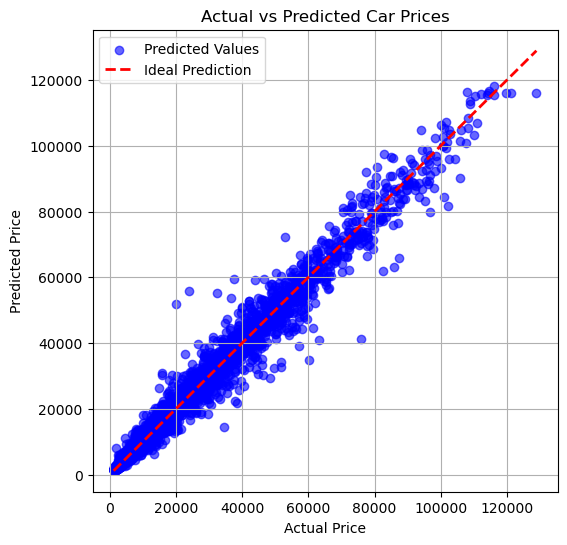

In [25]:
plt.figure(figsize=(6, 6))

# Scatter plot: Actual vs Predicted
plt.scatter(
    y_test,
    y_pred,
    color="blue",
    alpha=0.6,
    label="Predicted Values"
)

# Perfect prediction line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--",
    linewidth=2,
    label="Ideal Prediction"
)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.legend()
plt.grid(True)
plt.show()



## Feature Importance Analysis


In [26]:
# Get feature names
feature_names = (
    pipeline.named_steps["preprocessing"]
    .get_feature_names_out()
)

importances = pipeline.named_steps["model"].feature_importances_

feature_importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

feature_importance_df.head(10)


,feature,importance
3,num__Horsepower,0.453050
1,num__Mileage(km),0.385654
0,num__CarAge,0.049119
8,cat__Brand_Audi,0.020201
25,cat__Condition_Damaged,0.018539
13,cat__Brand_Ford,0.011739
27,cat__Condition_Used,0.010304
7,num__FuelEfficiency(L/100km),0.008293
18,cat__Brand_Mercedes-Benz,0.006318
41,cat__BodyType_SUV,0.005363


### Residuals Visualization

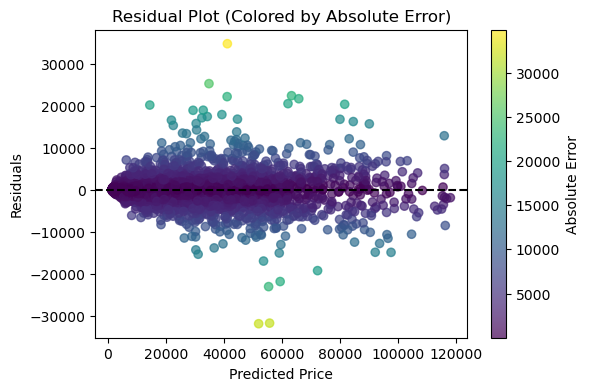

In [27]:
residuals = y_test - y_pred
abs_error = np.abs(residuals)

plt.figure(figsize=(6, 4))
scatter = plt.scatter(
    y_pred,
    residuals,
    c=abs_error,
    cmap="viridis",
    alpha=0.7
)
plt.axhline(0, linestyle="--", color="black")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot (Colored by Absolute Error)")
plt.colorbar(scatter, label="Absolute Error")
plt.show()


## Model Persistence


In [32]:
# Save pipeline
with open("../model/car_price_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

# Load pipeline
with open("../model/car_price_pipeline.pkl", "rb") as f:
    loaded_pipeline = pickle.load(f)

# Sample prediction check
sample_data = X.iloc[[0]]
print(df_cleaned.loc[sample_data.index])
loaded_pipeline.predict(sample_data)


     Brand  CarAge Condition  Mileage(km)  EngineSize(L)  FuelType  \
0  Porsche      17      Used       256395            3.3  Gasoline   

   Horsepower  Torque Transmission DriveType BodyType  Doors  Seats  \
0         513     395       Manual       AWD    Sedan      4      4   

  AccidentHistory Insurance RegistrationStatus  FuelEfficiency(L/100km)  \
0              No     Valid         Incomplete                    11.96   

   Price($)  
0     13884  


array([13259.67])

## Conclusion


### Summary
- The Random Forest model achieves **~99% R² score**
- Dimensionality was controlled by removing high-cardinality features
- Pipeline ensures **no data leakage**
- Fully production-ready workflow

### Why Random Forest?
- Handles non-linear feature interactions
- Works well with mixed feature types
- Robust and accurate without tuning

### Future Improvements
- Target encoding for selected categorical variables
- Feature importance–based pruning
- Model deployment using Flask / Streamlit
- Hyperparameter tuning on cloud resources

### Assumptions
- Dataset represents realistic market pricing
- No data leakage between train and test sets
- Price is influenced primarily by car condition and specifications

